# Analyzing Sales Data

## Import Libraries

In [164]:
import warnings
import pandas as pd
import numpy as np
import itertools
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from pylab import rcParams
import functools

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## Import Data

In [109]:
data = pd.read_csv('sales_data_sample.csv',encoding='cp1252')

In [3]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


## Who are the most profitable customers?

Step 1: clean data
Step 2: create unique customer number
Step 3: define who are the most profitable

In [4]:
customer_sales = data.drop(['ORDERLINENUMBER', 'STATUS','QTR_ID','MONTH_ID',
           'ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','POSTALCODE',
           'TERRITORY','PRICEEACH','ORDERNUMBER','QUANTITYORDERED',
           'PRODUCTLINE','MSRP','PRODUCTCODE','CONTACTLASTNAME',
           'CONTACTFIRSTNAME','PHONE','ORDERDATE','COUNTRY','YEAR_ID'],axis=1)

In [5]:
column_order = ['CUSTOMERNAME','SALES','DEALSIZE']
customer_sales = customer_sales[column_order]

In [6]:
customer_sales.sort_values(by=['SALES'], ascending=False).head()

,CUSTOMERNAME,SALES,DEALSIZE
598,The Sharp Gifts Warehouse,14082.8,Large
744,Online Diecast Creations Co.,12536.5,Large
53,Euro Shopping Channel,12001.0,Large
1062,Euro Shopping Channel,11887.8,Large
104,"UK Collectables, Ltd.",11886.6,Large


In [7]:
contable = pd.crosstab(customer_sales['CUSTOMERNAME'],customer_sales['DEALSIZE'])
contable.sort_values(by=['Large'], ascending=False).head(10)

DEALSIZE,Large,Medium,Small
CUSTOMERNAME,,,
Mini Gifts Distributors Ltd.,11,92,77
Euro Shopping Channel,11,131,117
The Sharp Gifts Warehouse,6,16,18
Muscle Machine Inc,5,28,15
Danish Wholesale Imports,5,18,13
"Corrida Auto Replicas, Ltd",4,14,14
L'ordine Souveniers,4,13,22
Diecast Classics Inc.,4,12,15
Salzburg Collectables,4,20,16


In [8]:
avg_sales = customer_sales.groupby(['CUSTOMERNAME']).mean().sort_values(by=['SALES'],ascending=False)

In [9]:
avg_sales.head(10)

,SALES
CUSTOMERNAME,
Super Scale Inc.,4674.827647
Mini Caravy,4233.604211
"La Corne D'abondance, Co.",4226.246957
Royale Belge,4180.012500
Muscle Machine Inc,4119.519583
Gift Depot Inc.,4075.791600
"UK Collectables, Ltd.",4069.250690
Danish Wholesale Imports,4028.933333
"Dragon Souveniers, Ltd.",4023.015814


In [10]:
tot_sales = customer_sales.groupby(['CUSTOMERNAME']).sum().sort_values(by=['SALES'],ascending=False)

In [11]:
tot_sales.head(10)

,SALES
CUSTOMERNAME,
Euro Shopping Channel,912294.11
Mini Gifts Distributors Ltd.,654858.06
"Australian Collectors, Co.",200995.41
Muscle Machine Inc,197736.94
La Rochelle Gifts,180124.90
"Dragon Souveniers, Ltd.",172989.68
Land of Toys Inc.,164069.44
The Sharp Gifts Warehouse,160010.27
"AV Stores, Co.",157807.81


In [12]:
tot_orders = customer_sales.groupby(['CUSTOMERNAME']).count().sort_values(by=['SALES'],ascending=False)

In [13]:
tot_orders = tot_orders.drop('DEALSIZE',axis=1)

In [14]:
tot_orders.head()

,SALES
CUSTOMERNAME,
Euro Shopping Channel,259
Mini Gifts Distributors Ltd.,180
"Australian Collectors, Co.",55
La Rochelle Gifts,53
"AV Stores, Co.",51


In [15]:
combo = pd.merge(tot_orders, tot_sales, on='CUSTOMERNAME')

In [16]:
combo = pd.merge(combo, avg_sales, on='CUSTOMERNAME')

In [17]:
combo = combo.rename(columns={'SALES_x':'Total_orders','SALES_y':'Total_sales','SALES':'Avg_order_value'})

In [18]:
combo['% global_orders']=combo['Total_orders']/sum(combo['Total_orders'])*100

In [19]:
combo['% global_sales']=combo['Total_sales']/sum(combo['Total_sales'])*100

In [20]:
combo.sort_values(by=['% global_orders'],ascending=False).head(10)

,Total_orders,Total_sales,Avg_order_value,% global_orders,% global_sales
CUSTOMERNAME,,,,,
Euro Shopping Channel,259,912294.11,3522.371081,9.174637,9.093271
Mini Gifts Distributors Ltd.,180,654858.06,3638.100333,6.376196,6.527283
"Australian Collectors, Co.",55,200995.41,3654.462000,1.948282,2.003417
La Rochelle Gifts,53,180124.90,3398.583019,1.877435,1.795391
"AV Stores, Co.",51,157807.81,3094.270784,1.806589,1.572946
Land of Toys Inc.,49,164069.44,3348.355918,1.735742,1.635358
Muscle Machine Inc,48,197736.94,4119.519583,1.700319,1.970938
Rovelli Gifts,48,137955.72,2874.077500,1.700319,1.375071
"Anna's Decorations, Ltd",46,153996.13,3347.741957,1.629472,1.534953


### Remove outliers

In [21]:
combo = combo.drop(['Euro Shopping Channel','Mini Gifts Distributors Ltd.'])

### Plot 

No handles with labels found to put in legend.


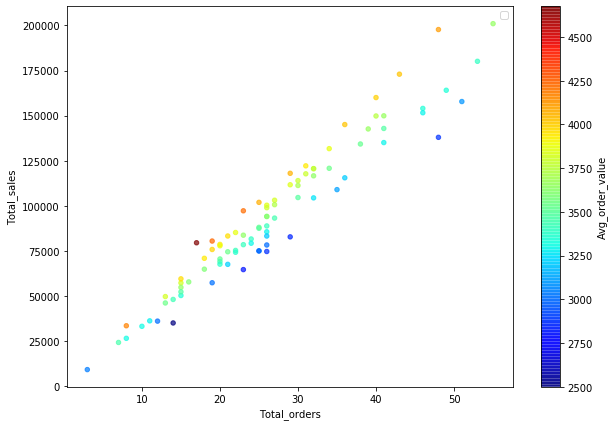

In [22]:
combo.plot(kind="scatter", x="Total_orders", y="Total_sales", alpha=0.7,
     figsize=(10,7),
    c="Avg_order_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

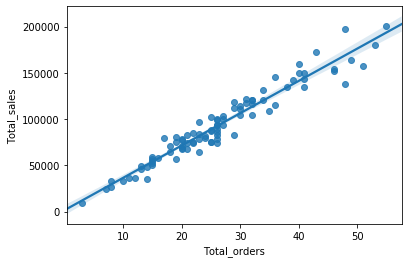

In [23]:
sns.regplot(combo['Total_orders'], combo['Total_sales'])

#### Let's test the hypothesis: the more orders a customer makes, the more sales they make

In [24]:
#correlation:
print(combo.corr())

                 Total_orders  Total_sales  Avg_order_value  % global_orders  \
Total_orders         1.000000     0.967797         0.001363         1.000000   
Total_sales          0.967797     1.000000         0.231272         0.967797   
Avg_order_value      0.001363     0.231272         1.000000         0.001363   
% global_orders      1.000000     0.967797         0.001363         1.000000   
% global_sales       0.967797     1.000000         0.231272         0.967797   

                 % global_sales  
Total_orders           0.967797  
Total_sales            1.000000  
Avg_order_value        0.231272  
% global_orders        0.967797  
% global_sales         1.000000  


In [25]:
#covariance:
print(np.cov(combo['Total_orders'], combo['Avg_order_value']))

[[1.24432459e+02 5.73944869e+00]
 [5.73944869e+00 1.42525316e+05]]


## Building a regression model

Is total orders or total sales a better

In [26]:
slope, intercept, r_value, _, std_err = stats.linregress(combo['Total_orders'], combo['Avg_order_value'])

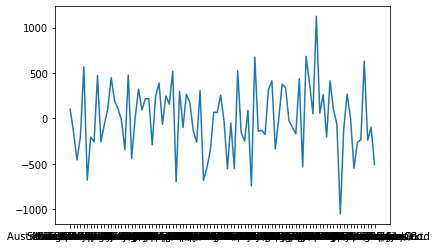

In [27]:
Y_pred = intercept + slope * combo['Total_orders']
res = combo['Avg_order_value'] - Y_pred
plt.plot(res)

In [28]:
RMSE = (sum(res **2)/len(combo['Total_orders'])) ** .5
RMSE

375.42168222081114

In [29]:
slope, intercept, r_value, _, std_err = stats.linregress(combo['Total_sales'], combo['Avg_order_value'])

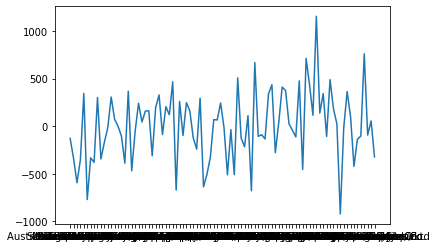

In [30]:
Y_pred = intercept + slope * combo['Total_sales']
res = combo['Avg_order_value'] - Y_pred
plt.plot(res)

In [31]:
RMSE = (sum(res **2)/len(combo['Total_sales'])) ** .5
RMSE

365.24405356979173

## Customer sales over time

In [32]:
data['YEAR_ID'].value_counts()

2004    1345
2003    1000
2005     478
Name: YEAR_ID, dtype: int64

In [38]:
time_data = data
time_data['TIMESTAMP']= pd.to_datetime(time_data['YEAR_ID'].map(str) +"-"+time_data['MONTH_ID'].map(str)+"-01 00:00:00")
time_data = time_data.drop(['ORDERLINENUMBER', 'STATUS','QTR_ID','MONTH_ID',
           'ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','POSTALCODE',
           'TERRITORY','PRICEEACH','ORDERNUMBER','QUANTITYORDERED',
           'PRODUCTLINE','MSRP','PRODUCTCODE','CONTACTLASTNAME',
           'CONTACTFIRSTNAME','PHONE','ORDERDATE','COUNTRY','YEAR_ID','DEALSIZE'],axis=1)
time_data = time_data.set_index('TIMESTAMP')
time_data = time_data.sort_values(by=['TIMESTAMP'], ascending=True)
grouped_sales = time_data.groupby(['TIMESTAMP']).sum()
grouped_sales.plot(figsize=(15, 6))
plt.show()

In [39]:
time_data['TIMESTAMP']= pd.to_datetime(time_data['YEAR_ID'].map(str) +"-"+time_data['MONTH_ID'].map(str)+"-01 00:00:00")

In [40]:
time_data = time_data.drop(['ORDERLINENUMBER', 'STATUS','QTR_ID','MONTH_ID',
           'ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','POSTALCODE',
           'TERRITORY','PRICEEACH','ORDERNUMBER','QUANTITYORDERED',
           'PRODUCTLINE','MSRP','PRODUCTCODE','CONTACTLASTNAME',
           'CONTACTFIRSTNAME','PHONE','ORDERDATE','COUNTRY','YEAR_ID','DEALSIZE'],axis=1)

In [42]:
time_data = time_data.set_index('TIMESTAMP')
time_data.index

DatetimeIndex(['2003-02-01', '2003-05-01', '2003-07-01', '2003-08-01',
               '2003-10-01', '2003-10-01', '2003-11-01', '2003-11-01',
               '2003-12-01', '2004-01-01',
               ...
               '2004-09-01', '2004-10-01', '2004-10-01', '2004-11-01',
               '2004-11-01', '2004-12-01', '2005-01-01', '2005-03-01',
               '2005-03-01', '2005-05-01'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=2823, freq=None)

In [53]:
time_data = time_data.sort_values(by=['TIMESTAMP'], ascending=True)

In [54]:
grouped_sales = time_data.groupby(['TIMESTAMP']).sum()

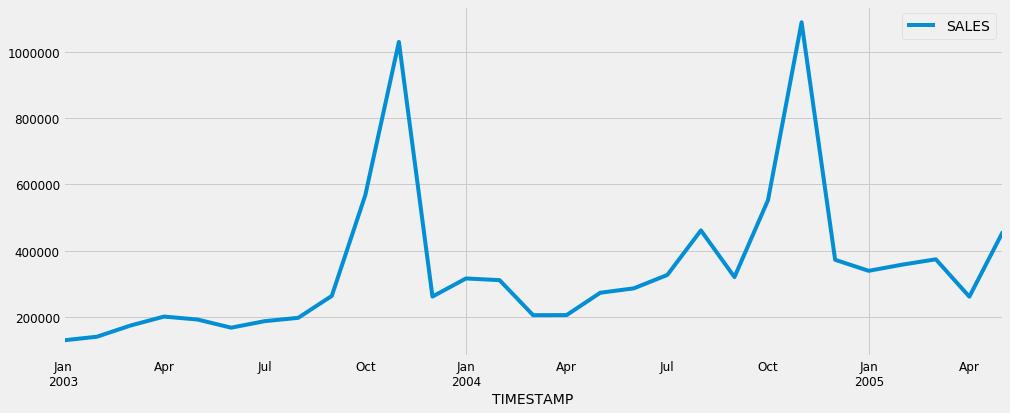

In [66]:
grouped_sales.plot(figsize=(15, 6))
plt.show()

#### Plotting trend, seasonality and noise

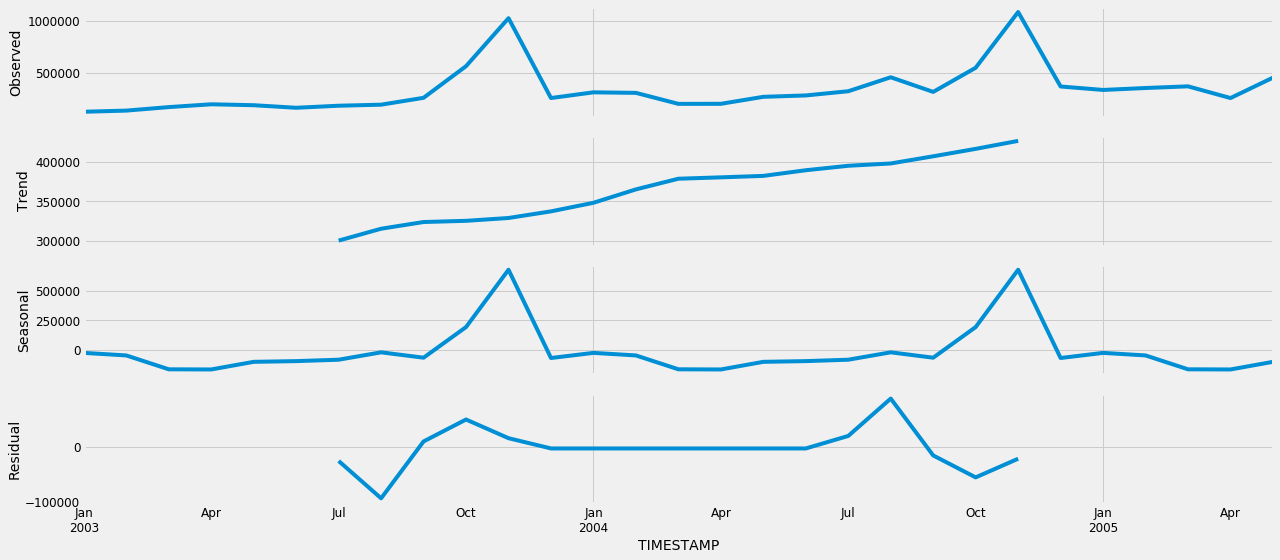

In [73]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(grouped_sales, model='additive')
fig = decomposition.plot()
plt.show()

## Time series forecasting

ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

In [76]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [89]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(grouped_sales,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:806.3790688267711
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:423.3340994220888
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:445.8402128694801
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:133.63598269298905
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:768.1180155564614
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:391.70685165969076
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:478.2164161809429
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:135.58157704633155
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:752.6211170933615
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:394.24567121716154
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:416.6738721421284
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:107.83801828409577
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:722.057978008672
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:363.1806659754223
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:436.28721737032254
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:106.98983420206416
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:779.0067353399872
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:414.06995799147694
ARI

The above output suggests that SARIMAX(1, 1, 1)x(1, 1, 0, 12)12 yields the lowest AIC value of 297.78. Therefore we should consider this to be optimal option.

#### Fitting ARIMA model

In [90]:
mod = sm.tsa.statespace.SARIMAX(grouped_sales,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1867   3951.651     -0.000      1.000   -7746.279    7743.906
ma.L1         -0.9836     91.105     -0.011      0.991    -179.547     177.579
ar.S.L12      -0.1589    946.138     -0.000      1.000   -1854.556    1854.238
sigma2      8.758e+09      0.002   5.39e+12      0.000    8.76e+09    8.76e+09


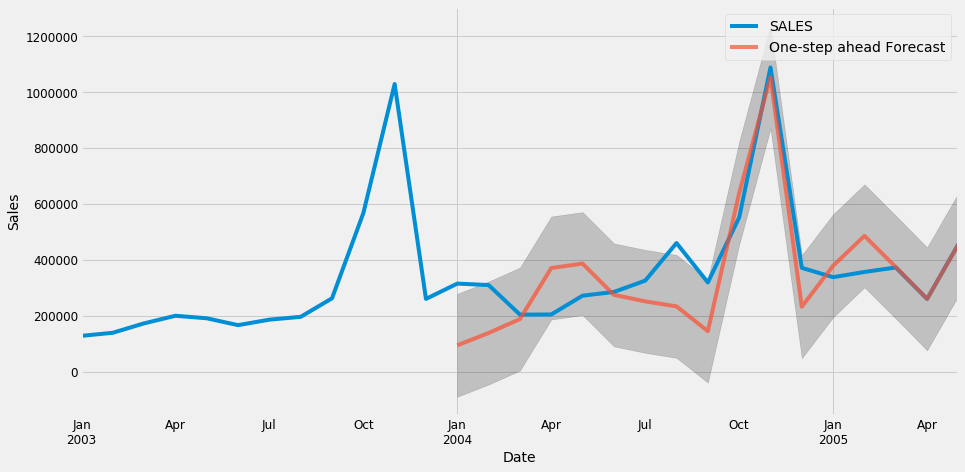

In [96]:
pred = results.get_prediction(start=pd.to_datetime('2004-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = grouped_sales['2003':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [101]:
y_forecasted = pred.predicted_mean
y_truth = grouped_sales['2002-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2004-01-01 00:00:00   NaN
2004-02-01 00:00:00   NaN
2004-03-01 00:00:00   NaN
2004-04-01 00:00:00   NaN
2004-05-01 00:00:00   NaN
2004-06-01 00:00:00   NaN
2004-07-01 00:00:00   NaN
2004-08-01 00:00:00   NaN
2004-09-01 00:00:00   NaN
2004-10-01 00:00:00   NaN
2004-11-01 00:00:00   NaN
2004-12-01 00:00:00   NaN
2005-01-01 00:00:00   NaN
2005-02-01 00:00:00   NaN
2005-03-01 00:00:00   NaN
2005-04-01 00:00:00   NaN
2005-05-01 00:00:00   NaN
SALES                 NaN
dtype: float64


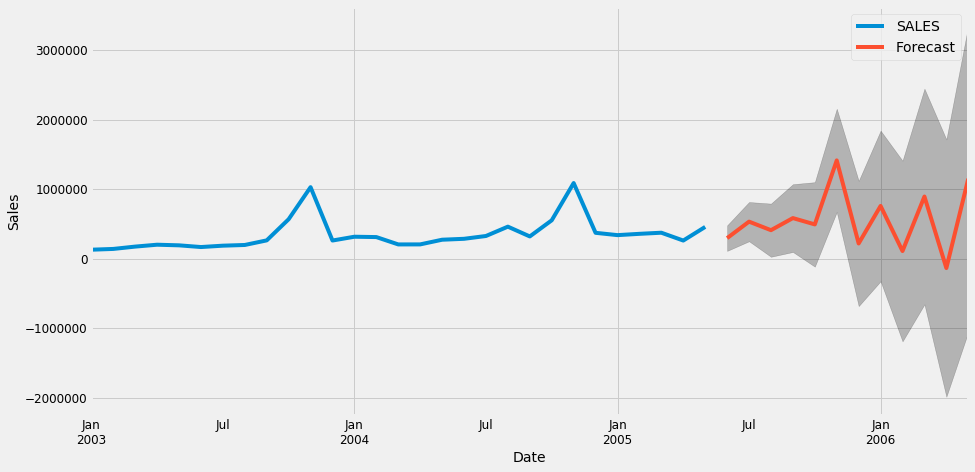

In [120]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = grouped_sales.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

## Comparing products

In [119]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [111]:
data['PRODUCTLINE'].value_counts()

Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: PRODUCTLINE, dtype: int64

In [118]:
data[['PRODUCTLINE','MSRP']].groupby(by='PRODUCTLINE').mean().round(2)

,MSRP
PRODUCTLINE,
Classic Cars,119.89
Motorcycles,97.07
Planes,88.77
Ships,86.13
Trains,72.99
Trucks and Buses,102.47
Vintage Cars,86.46


We can see that classic cars have the highest retail value, and vintage cars the lowest. They also happen to be the two most popular products that were bought. 

In [121]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [197]:
classic_cars = data[data['PRODUCTLINE']=="Classic Cars"]
vintage_cars = data[data['PRODUCTLINE']=="Vintage Cars"]
motorcycles = data[data['PRODUCTLINE']=="Motorcycles"]
planes = data[data['PRODUCTLINE']=="Planes"]
ships = data[data['PRODUCTLINE']=="Ships"]
trains = data[data['PRODUCTLINE']=="Trains"]
trucks_buses = data[data['PRODUCTLINE']=="Trucks and Buses"]

In [198]:
classic_cars['TIMESTAMP']= pd.to_datetime(classic_cars['YEAR_ID'].map(str) +"-"
                                          +classic_cars['MONTH_ID'].map(str)+"-01 00:00:00")
vintage_cars['TIMESTAMP']= pd.to_datetime(vintage_cars['YEAR_ID'].map(str) +"-"
                                          +vintage_cars['MONTH_ID'].map(str)+"-01 00:00:00")
motorcycles['TIMESTAMP']= pd.to_datetime(motorcycles['YEAR_ID'].map(str) +"-"
                                          +motorcycles['MONTH_ID'].map(str)+"-01 00:00:00")
planes['TIMESTAMP']= pd.to_datetime(planes['YEAR_ID'].map(str) +"-"
                                          +planes['MONTH_ID'].map(str)+"-01 00:00:00")
ships['TIMESTAMP']= pd.to_datetime(ships['YEAR_ID'].map(str) +"-"
                                          +ships['MONTH_ID'].map(str)+"-01 00:00:00")
trains['TIMESTAMP']= pd.to_datetime(trains['YEAR_ID'].map(str) +"-"
                                          +trains['MONTH_ID'].map(str)+"-01 00:00:00")
trucks_buses['TIMESTAMP']= pd.to_datetime(trucks_buses['YEAR_ID'].map(str) +"-"
                                          +trucks_buses['MONTH_ID'].map(str)+"-01 00:00:00")

In [199]:
classic_cars = classic_cars.drop(['ORDERLINENUMBER', 'STATUS','QTR_ID','MONTH_ID',
           'ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','POSTALCODE',
           'TERRITORY','PRICEEACH','ORDERNUMBER','QUANTITYORDERED',
           'PRODUCTLINE','MSRP','PRODUCTCODE','CONTACTLASTNAME',
           'CONTACTFIRSTNAME','PHONE','ORDERDATE','COUNTRY','YEAR_ID','DEALSIZE'],axis=1)

vintage_cars = vintage_cars.drop(['ORDERLINENUMBER', 'STATUS','QTR_ID','MONTH_ID',
           'ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','POSTALCODE',
           'TERRITORY','PRICEEACH','ORDERNUMBER','QUANTITYORDERED',
           'PRODUCTLINE','MSRP','PRODUCTCODE','CONTACTLASTNAME',
           'CONTACTFIRSTNAME','PHONE','ORDERDATE','COUNTRY','YEAR_ID','DEALSIZE'],axis=1)

motorcycles = motorcycles.drop(['ORDERLINENUMBER', 'STATUS','QTR_ID','MONTH_ID',
           'ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','POSTALCODE',
           'TERRITORY','PRICEEACH','ORDERNUMBER','QUANTITYORDERED',
           'PRODUCTLINE','MSRP','PRODUCTCODE','CONTACTLASTNAME',
           'CONTACTFIRSTNAME','PHONE','ORDERDATE','COUNTRY','YEAR_ID','DEALSIZE'],axis=1)

planes = planes.drop(['ORDERLINENUMBER', 'STATUS','QTR_ID','MONTH_ID',
           'ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','POSTALCODE',
           'TERRITORY','PRICEEACH','ORDERNUMBER','QUANTITYORDERED',
           'PRODUCTLINE','MSRP','PRODUCTCODE','CONTACTLASTNAME',
           'CONTACTFIRSTNAME','PHONE','ORDERDATE','COUNTRY','YEAR_ID','DEALSIZE'],axis=1)

ships = ships.drop(['ORDERLINENUMBER', 'STATUS','QTR_ID','MONTH_ID',
           'ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','POSTALCODE',
           'TERRITORY','PRICEEACH','ORDERNUMBER','QUANTITYORDERED',
           'PRODUCTLINE','MSRP','PRODUCTCODE','CONTACTLASTNAME',
           'CONTACTFIRSTNAME','PHONE','ORDERDATE','COUNTRY','YEAR_ID','DEALSIZE'],axis=1)

trains = trains.drop(['ORDERLINENUMBER', 'STATUS','QTR_ID','MONTH_ID',
           'ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','POSTALCODE',
           'TERRITORY','PRICEEACH','ORDERNUMBER','QUANTITYORDERED',
           'PRODUCTLINE','MSRP','PRODUCTCODE','CONTACTLASTNAME',
           'CONTACTFIRSTNAME','PHONE','ORDERDATE','COUNTRY','YEAR_ID','DEALSIZE'],axis=1)

trucks_buses = trucks_buses.drop(['ORDERLINENUMBER', 'STATUS','QTR_ID','MONTH_ID',
           'ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','POSTALCODE',
           'TERRITORY','PRICEEACH','ORDERNUMBER','QUANTITYORDERED',
           'PRODUCTLINE','MSRP','PRODUCTCODE','CONTACTLASTNAME',
           'CONTACTFIRSTNAME','PHONE','ORDERDATE','COUNTRY','YEAR_ID','DEALSIZE'],axis=1)

In [200]:
classic_cars = classic_cars.sort_values('TIMESTAMP')
vintage_cars = vintage_cars.sort_values('TIMESTAMP')
motorcycles = motorcycles.sort_values('TIMESTAMP')
planes = planes.sort_values('TIMESTAMP')
ships = ships.sort_values('TIMESTAMP')
trains = trains.sort_values('TIMESTAMP')
trucks_buses = trucks_buses.sort_values('TIMESTAMP')

classic_cars = classic_cars.groupby('TIMESTAMP')['SALES'].sum().reset_index()
vintage_cars = vintage_cars.groupby('TIMESTAMP')['SALES'].sum().reset_index()
motorcycles = motorcycles.groupby('TIMESTAMP')['SALES'].sum().reset_index()
planes = planes.groupby('TIMESTAMP')['SALES'].sum().reset_index()
ships = ships.groupby('TIMESTAMP')['SALES'].sum().reset_index()
trains = trains.groupby('TIMESTAMP')['SALES'].sum().reset_index()
trucks_buses = trucks_buses.groupby('TIMESTAMP')['SALES'].sum().reset_index()

classic_cars = classic_cars.set_index('TIMESTAMP')
vintage_cars = vintage_cars.set_index('TIMESTAMP')
motorcycles = motorcycles.set_index('TIMESTAMP')
planes = planes.set_index('TIMESTAMP')
ships = ships.set_index('TIMESTAMP')
trains = trains.set_index('TIMESTAMP')
trucks_buses = trucks_buses.set_index('TIMESTAMP')

y_classic_cars = classic_cars['SALES']
y_vintage_cars = vintage_cars['SALES']
y_motorcycles = motorcycles['SALES']
y_planes = planes['SALES']
y_ships = ships['SALES']
y_trains = trains['SALES']
y_trucks_buses = trucks_buses['SALES']

classic_cars = pd.DataFrame({'TIMESTAMP':y_classic_cars.index, 'SALES':y_classic_cars.values})
vintage_cars = pd.DataFrame({'TIMESTAMP': y_vintage_cars.index, 'SALES': y_vintage_cars.values})
motorcycles = pd.DataFrame({'TIMESTAMP':y_motorcycles.index, 'SALES':y_motorcycles.values})
planes = pd.DataFrame({'TIMESTAMP':y_planes.index, 'SALES':y_planes.values})
ships = pd.DataFrame({'TIMESTAMP':y_ships.index, 'SALES':y_ships.values})
trains = pd.DataFrame({'TIMESTAMP':y_trains.index, 'SALES':y_trains.values})
trucks_buses = pd.DataFrame({'TIMESTAMP':y_trucks_buses.index, 'SALES':y_trucks_buses.values})

data_frames = [classic_cars,vintage_cars,motorcycles,planes,ships,trains,trucks_buses]

#store = classic_cars.merge(vintage_cars, how='inner', on='TIMESTAMP')

store = functools.reduce(lambda  left,right: pd.merge(left,right,on=['TIMESTAMP'],
                                            how='outer'), data_frames).fillna(0)

store.columns = ['TIMESTAMP','classic_car_sales','vintage_car_sales','motorcycle_sales','plane_sales',
                'ship_sales','train_sales','trucks_buses_sales']

store.head()

,TIMESTAMP,classic_car_sales,vintage_car_sales,motorcycle_sales,plane_sales,ship_sales,train_sales,trucks_buses_sales
0,2003-01-01,41191.78,46826.84,0.00,0.00,0.00,4933.55,36801.43
1,2003-02-01,20464.41,24002.23,25783.76,39205.31,27050.38,4330.10,0.00
2,2003-03-01,105026.68,46931.01,12639.15,0.00,0.00,0.00,9908.06
3,2003-04-01,59873.60,20750.34,23475.59,36563.34,27399.45,4756.47,28790.76
4,2003-05-01,98179.48,47033.58,22097.32,0.00,0.00,0.00,25362.73


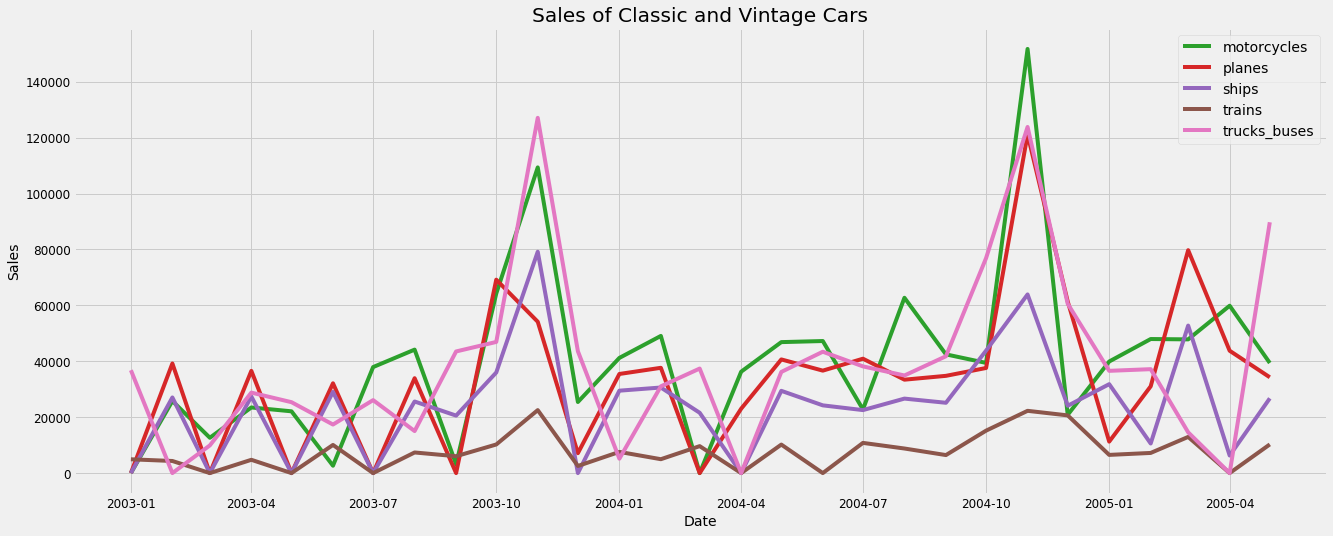

In [204]:
plt.figure(figsize=(20, 8))
#plt.plot(store['TIMESTAMP'], store['classic_car_sales'], 'tab:blue', label = 'classic cars')
#plt.plot(store['TIMESTAMP'], store['vintage_car_sales'], 'tab:orange', label = 'vintage cars')
plt.plot(store['TIMESTAMP'], store['motorcycle_sales'], 'tab:green', label = 'motorcycles')
plt.plot(store['TIMESTAMP'], store['plane_sales'], 'tab:red', label = 'planes')
plt.plot(store['TIMESTAMP'], store['ship_sales'], 'tab:purple', label = 'ships')
plt.plot(store['TIMESTAMP'], store['train_sales'], 'tab:brown', label = 'trains')
plt.plot(store['TIMESTAMP'], store['trucks_buses_sales'], 'tab:pink', label = 'trucks_buses')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Classic and Vintage Cars')
plt.legend();

In [202]:
first_date = store.ix[np.min(list(np.where(store['vintage_car_sales'] > store['classic_car_sales'])[0])), 'TIMESTAMP']
print("Vintage cars produced higher sales than classic cars for the first time in {}.".format(first_date.date()))

Vintage cars produced higher sales than classic cars for the first time in 2003-01-01.
